# Word Embeddings

In [ ]:
!pip install gensim
!pip install nltk
!pip install numpy
!pip install seaborn
!pip install scipy
!pip install matplotlib

In [16]:
import os
import logging
import os
import multiprocessing
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')
import numpy as np
import seaborn as sns
from scipy import spatial
import matplotlib.pyplot as plt

[nltk_data] Downloading package punkt to /home/solaris/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


import os
from gensim import utils
import gensim.models
import multiprocessing

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []
        # Directories containing the .txt files, specified within the class
        directories = [
            "../data/input/text/books_converted", 
            "../data/input/text/web_txt",
            "../data/input/audio_transcribed/transcribed_youtube",
            "../data/input/audio_transcribed/transscribed_audio_dharma"
        ]

        for directory in directories:
            # Construct the full directory path
            full_path = os.path.join(os.getcwd(), directory)
            try:
                files = os.listdir(full_path)
            except FileNotFoundError:
                print(f"Directory {full_path} not found.")
                continue

            txt_files = [file for file in files if file.endswith(".txt")]
            print(f"Found {len(txt_files)} .txt files in {directory}")

            for file in txt_files:
                with open(os.path.join(full_path, file), 'r', encoding='utf-8') as f:
                    for line in f:
                        self.lines.append(line.strip())  # strip() to remove whitespace

        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            # Preprocess the line and yield if not empty
            preprocessed_line = utils.simple_preprocess(line)
            if preprocessed_line:
                yield preprocessed_line


In [17]:
import os
import shutil  # Import shutil for file copying
from gensim import utils
import gensim.models
import multiprocessing

class MyCorpus:
    """An iterator that yields sentences (lists of str)."""

    def __init__(self):
        self.lines = []
        # Directories containing the .txt files, specified within the class
        directories = [
            "../data/input/text/books_converted", 
            "../data/input/text/web_txt",
            "../data/input/audio_transcribed/transcribed_youtube",
            "../data/input/audio_transcribed/transscribed_audio_dharma"
        ]

        # Create target directory for clean data if it doesn't exist
        clean_data_dir = "../data/input/clean_data"
        os.makedirs(clean_data_dir, exist_ok=True)

        for directory in directories:
            # Construct the full directory path
            full_path = os.path.join(os.getcwd(), directory)
            try:
                files = os.listdir(full_path)
            except FileNotFoundError:
                print(f"Directory {full_path} not found.")
                continue

            txt_files = [file for file in files if file.endswith(".txt")]
            print(f"Found {len(txt_files)} .txt files in {directory}")

            for file in txt_files:
                with open(os.path.join(full_path, file), 'r', encoding='utf-8') as f:
                    for line in f:
                        self.lines.append(line.strip())  # strip() to remove whitespace

                # Copy the cleaned file to the clean_data directory
                shutil.copy(os.path.join(full_path, file), os.path.join(clean_data_dir, file))

        print(f"Got {len(self.lines)} lines.")

    def __iter__(self):
        for line in self.lines:
            # Preprocess the line and yield if not empty
            preprocessed_line = utils.simple_preprocess(line)
            if preprocessed_line:
                yield preprocessed_line


# Train Model

Train Gensim Word2Vec model on the given text data and visualize the word embeddings using PCA and t-SNE.

In [18]:

# Initialize the corpus without any arguments
sentences = MyCorpus()

# Train a Word2Vec model
model = gensim.models.Word2Vec(
    # epochs=10, # adjust this to train for longer, default is 5
    # low contrast is a small dataset, big contrast is a big dataset
    epochs=5,
    sentences=sentences,
    sg=1,
    vector_size=300,
    window=20,
    min_count=3,
    workers=multiprocessing.cpu_count()
)

print("Done.")


Found 42 .txt files in ../data/input/text/books_converted
Found 174 .txt files in ../data/input/text/web_txt
Found 26 .txt files in ../data/input/audio_transcribed/transcribed_youtube
Found 310 .txt files in ../data/input/audio_transcribed/transscribed_audio_dharma
Got 157303 lines.
Done.


# Find Most Similar Words

In [19]:
model.wv.most_similar("jhana", topn=50)

[('jhanas', 0.671135663986206),
 ('shamatha', 0.6007883548736572),
 ('subsubjhana', 0.5955468416213989),
 ('hamatha', 0.5844174027442932),
 ('suga', 0.5762863159179688),
 ('so', 0.5724743604660034),
 ('notation', 0.5625951886177063),
 ('jhanic', 0.5610504746437073),
 ('esque', 0.5585564970970154),
 ('subñana', 0.5562471747398376),
 ('sookah', 0.5549499988555908),
 ('unremarkable', 0.554906964302063),
 ('undistractedly', 0.5508359670639038),
 ('cranking', 0.5493581891059875),
 ('nimital', 0.5479788184165955),
 ('hoops', 0.5456048250198364),
 ('grind', 0.5435028672218323),
 ('nimuta', 0.5433606505393982),
 ('landmark', 0.5432109236717224),
 ('unstick', 0.5431495308876038),
 ('concentration', 0.5424136519432068),
 ('effectors', 0.5410181879997253),
 ('vj', 0.5407682061195374),
 ('predominating', 0.5395384430885315),
 ('pleasurably', 0.5379779934883118),
 ('akagata', 0.534605085849762),
 ('pitya', 0.5328160524368286),
 ('vittakavi', 0.5311949253082275),
 ('equity', 0.5311464071273804),
 ('

In [20]:
model.wv.most_similar("meditation", topn=50)

[('practice', 0.7718636989593506),
 ('also', 0.6038597226142883),
 ('anupanasati', 0.577781081199646),
 ('do', 0.5749974250793457),
 ('and', 0.5739620923995972),
 ('so', 0.5736933350563049),
 ('but', 0.5713063478469849),
 ('we', 0.5678989291191101),
 ('crutch', 0.567837119102478),
 ('when', 0.5672312378883362),
 ('if', 0.5640212297439575),
 ('reconnection', 0.5581421852111816),
 ('lifer', 0.5561422109603882),
 ('to', 0.5548774600028992),
 ('other', 0.5529160499572754),
 ('metric', 0.5484334826469421),
 ('gumption', 0.5484088659286499),
 ('for', 0.5484020709991455),
 ('that', 0.5468394756317139),
 ('sally', 0.5456921458244324),
 ('can', 0.5449690818786621),
 ('this', 0.5441370606422424),
 ('on', 0.5421566367149353),
 ('unstick', 0.5394974946975708),
 ('zuzen', 0.5387811660766602),
 ('detachable', 0.5384374856948853),
 ('overdoing', 0.5379687547683716),
 ('as', 0.5375881195068359),
 ('way', 0.5373947620391846),
 ('have', 0.5371354818344116),
 ('about', 0.5367996692657471),
 ('then', 0.53

In [21]:
model.wv.most_similar("meditate", topn=50)

[('sit', 0.5965114831924438),
 ('mismeditate', 0.5484299063682556),
 ('gyno', 0.5384445786476135),
 ('meditating', 0.5358447432518005),
 ('peeking', 0.5270079374313354),
 ('hauling', 0.525151252746582),
 ('floss', 0.5204799175262451),
 ('vowing', 0.5184316039085388),
 ('typing', 0.5168275833129883),
 ('overdo', 0.5132811665534973),
 ('gusto', 0.5108936429023743),
 ('aircraft', 0.5104189515113831),
 ('huts', 0.5101907849311829),
 ('bhikkhuvi', 0.5098720788955688),
 ('muster', 0.5045159459114075),
 ('eerie', 0.5044363141059875),
 ('tractable', 0.5039288997650146),
 ('packing', 0.5037109851837158),
 ('antsy', 0.5035672783851624),
 ('ringer', 0.5028138160705566),
 ('unaccustomed', 0.500034511089325),
 ('kneel', 0.49983713030815125),
 ('sma', 0.4979889988899231),
 ('dishwashing', 0.49658825993537903),
 ('upshot', 0.49643081426620483),
 ('jealously', 0.4956430494785309),
 ('entertainments', 0.49352964758872986),
 ('cubicle', 0.492718368768692),
 ('swarming', 0.49233120679855347),
 ('shower',

In [22]:
model.wv.most_similar("practice", topn=50)

[('meditation', 0.7718637585639954),
 ('but', 0.6632891297340393),
 ('do', 0.6590022444725037),
 ('tenderly', 0.6363344192504883),
 ('way', 0.6343361735343933),
 ('that', 0.6319150924682617),
 ('overdoing', 0.6298143863677979),
 ('to', 0.6294140219688416),
 ('lifer', 0.627333402633667),
 ('this', 0.6266215443611145),
 ('also', 0.6216002702713013),
 ('can', 0.6212893128395081),
 ('crutch', 0.6195501685142517),
 ('we', 0.6174871921539307),
 ('then', 0.6169493794441223),
 ('when', 0.6167593002319336),
 ('overemphasis', 0.6151084899902344),
 ('scenic', 0.6118522882461548),
 ('it', 0.6112637519836426),
 ('reconnection', 0.6100751161575317),
 ('so', 0.6094397306442261),
 ('have', 0.6088470220565796),
 ('tenacity', 0.6086006760597229),
 ('bask', 0.6078054308891296),
 ('for', 0.6053822636604309),
 ('these', 0.6051529049873352),
 ('adventurous', 0.6046741604804993),
 ('metric', 0.6046171188354492),
 ('lenging', 0.6038288474082947),
 ('astoundingly', 0.6036673784255981),
 ('diagnosing', 0.600615

In [23]:
model.wv.most_similar("concentrates", topn=50)

[('steadies', 0.7737165689468384),
 ('unifies', 0.6572555899620056),
 ('awarenessâ', 0.6420838236808777),
 ('absorbs', 0.6277427077293396),
 ('jagged', 0.627530574798584),
 ('folds', 0.6269659996032715),
 ('wayâ', 0.6191179156303406),
 ('tarnished', 0.6150504350662231),
 ('slackening', 0.6080994606018066),
 ('constraining', 0.603969156742096),
 ('outstretched', 0.6037914752960205),
 ('womanâ', 0.5985415577888489),
 ('wavelets', 0.5960915088653564),
 ('lifts', 0.5954774022102356),
 ('quiets', 0.5952736735343933),
 ('mouthâ', 0.5945950150489807),
 ('ject', 0.5932941436767578),
 ('manâ', 0.5921128988265991),
 ('outgoing', 0.589210569858551),
 ('anchors', 0.5837493538856506),
 ('disorderliness', 0.5836021900177002),
 ('crosslegged', 0.5830988883972168),
 ('immerses', 0.582133948802948),
 ('quickened', 0.5808517932891846),
 ('witaka', 0.5793879628181458),
 ('buzzes', 0.5759197473526001),
 ('headâ', 0.5745514631271362),
 ('kneaded', 0.5731338858604431),
 ('rudder', 0.5712112188339233),
 ('ri

In [24]:
model.wv.most_similar("concentration", topn=50)

[('conica', 0.5856997966766357),
 ('mind', 0.5784489512443542),
 ('snugly', 0.5754092335700989),
 ('unstick', 0.5664656758308411),
 ('lished', 0.5662709474563599),
 ('overdoing', 0.5633310079574585),
 ('insight', 0.5623881220817566),
 ('so', 0.5587262511253357),
 ('faltering', 0.5574538707733154),
 ('offset', 0.5561269521713257),
 ('adage', 0.555820643901825),
 ('byproducts', 0.5539032816886902),
 ('dimin', 0.5534996390342712),
 ('blunders', 0.5517197251319885),
 ('adeptness', 0.5517062544822693),
 ('unused', 0.5463087558746338),
 ('snagged', 0.544363796710968),
 ('ulti', 0.5442571043968201),
 ('practice', 0.5439407229423523),
 ('skillfulnessâ', 0.5435842275619507),
 ('trating', 0.5431039333343506),
 ('enhanc', 0.5426223874092102),
 ('jhana', 0.542413592338562),
 ('footholds', 0.5405954718589783),
 ('upakara', 0.5405534505844116),
 ('superpowers', 0.5392746329307556),
 ('upachara', 0.539265513420105),
 ('snowball', 0.5364870429039001),
 ('appana', 0.5361180305480957),
 ('interject', 0.

# Wordcloud

Top 100 words in terms of frequency:
heartwood: 6.272152423858643
disenchanted: 6.261500835418701
births: 6.247131824493408
percipient: 6.217304706573486
abstains: 6.171964168548584
trains: 6.163552284240723
salutation: 6.133425235748291
wieldy: 6.083987236022949
greetings: 6.049723148345947
cognizable: 6.046018123626709
unarisen: 6.043017864227295
affliction: 6.001423358917236
kalāpas: 5.9990763664245605
piyarūpaṃ: 5.998370170593262
pajānāti: 5.974340438842773
sātarūpaṃ: 5.970200061798096
cognized: 5.937474250793457
bone: 5.934002876281738
taint: 5.924807548522949
etth: 5.916248321533203
disagreeable: 5.891582489013672
ind: 5.887167930603027
endures: 5.88661003112793
wrongdoing: 5.8857808113098145
attainer: 5.8857102394104
moisture: 5.884051322937012
subsiding: 5.846806049346924
monarch: 5.829080104827881
reckoned: 5.827192783355713
discerns: 5.826559543609619
sinews: 5.819254398345947
afflictive: 5.816090106964111
lamentation: 5.797207832336426
inclines: 5.783043384552002
trans: 5.78

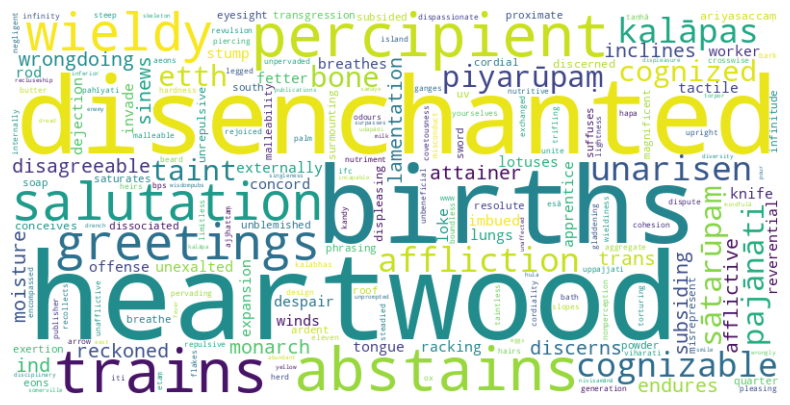

In [25]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import numpy as np

# Assuming 'model' is already defined and loaded as per your setup
# Extract word vectors from the model
word_vectors = model.wv

# Use vector norms as a proxy for word importance
word_importance = {word: np.linalg.norm(word_vectors[word]) for word in word_vectors.index_to_key}

# List of words to exclude
#exclude_words = ['org', 'dharmaseed', 'registration', 'mfn', 'vb', 'ref', 'à¹', 'vā']

# Filter out the words to exclude
filtered_word_importance = {word: importance for word, importance in word_importance.items() if word not in exclude_words}

# Sort the filtered_word_importance dictionary by its values in descending order
sorted_word_importance = sorted(filtered_word_importance.items(), key=lambda x: x[1], reverse=True)

# Print the top 100 words in terms of frequency
print("Top 100 words in terms of frequency:")
for word, importance in sorted_word_importance[:100]:
    print(f"{word}: {importance}")

# Generate a word cloud with the filtered dictionary
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(filtered_word_importance)

# Display the word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()




# Plot Word Similarities

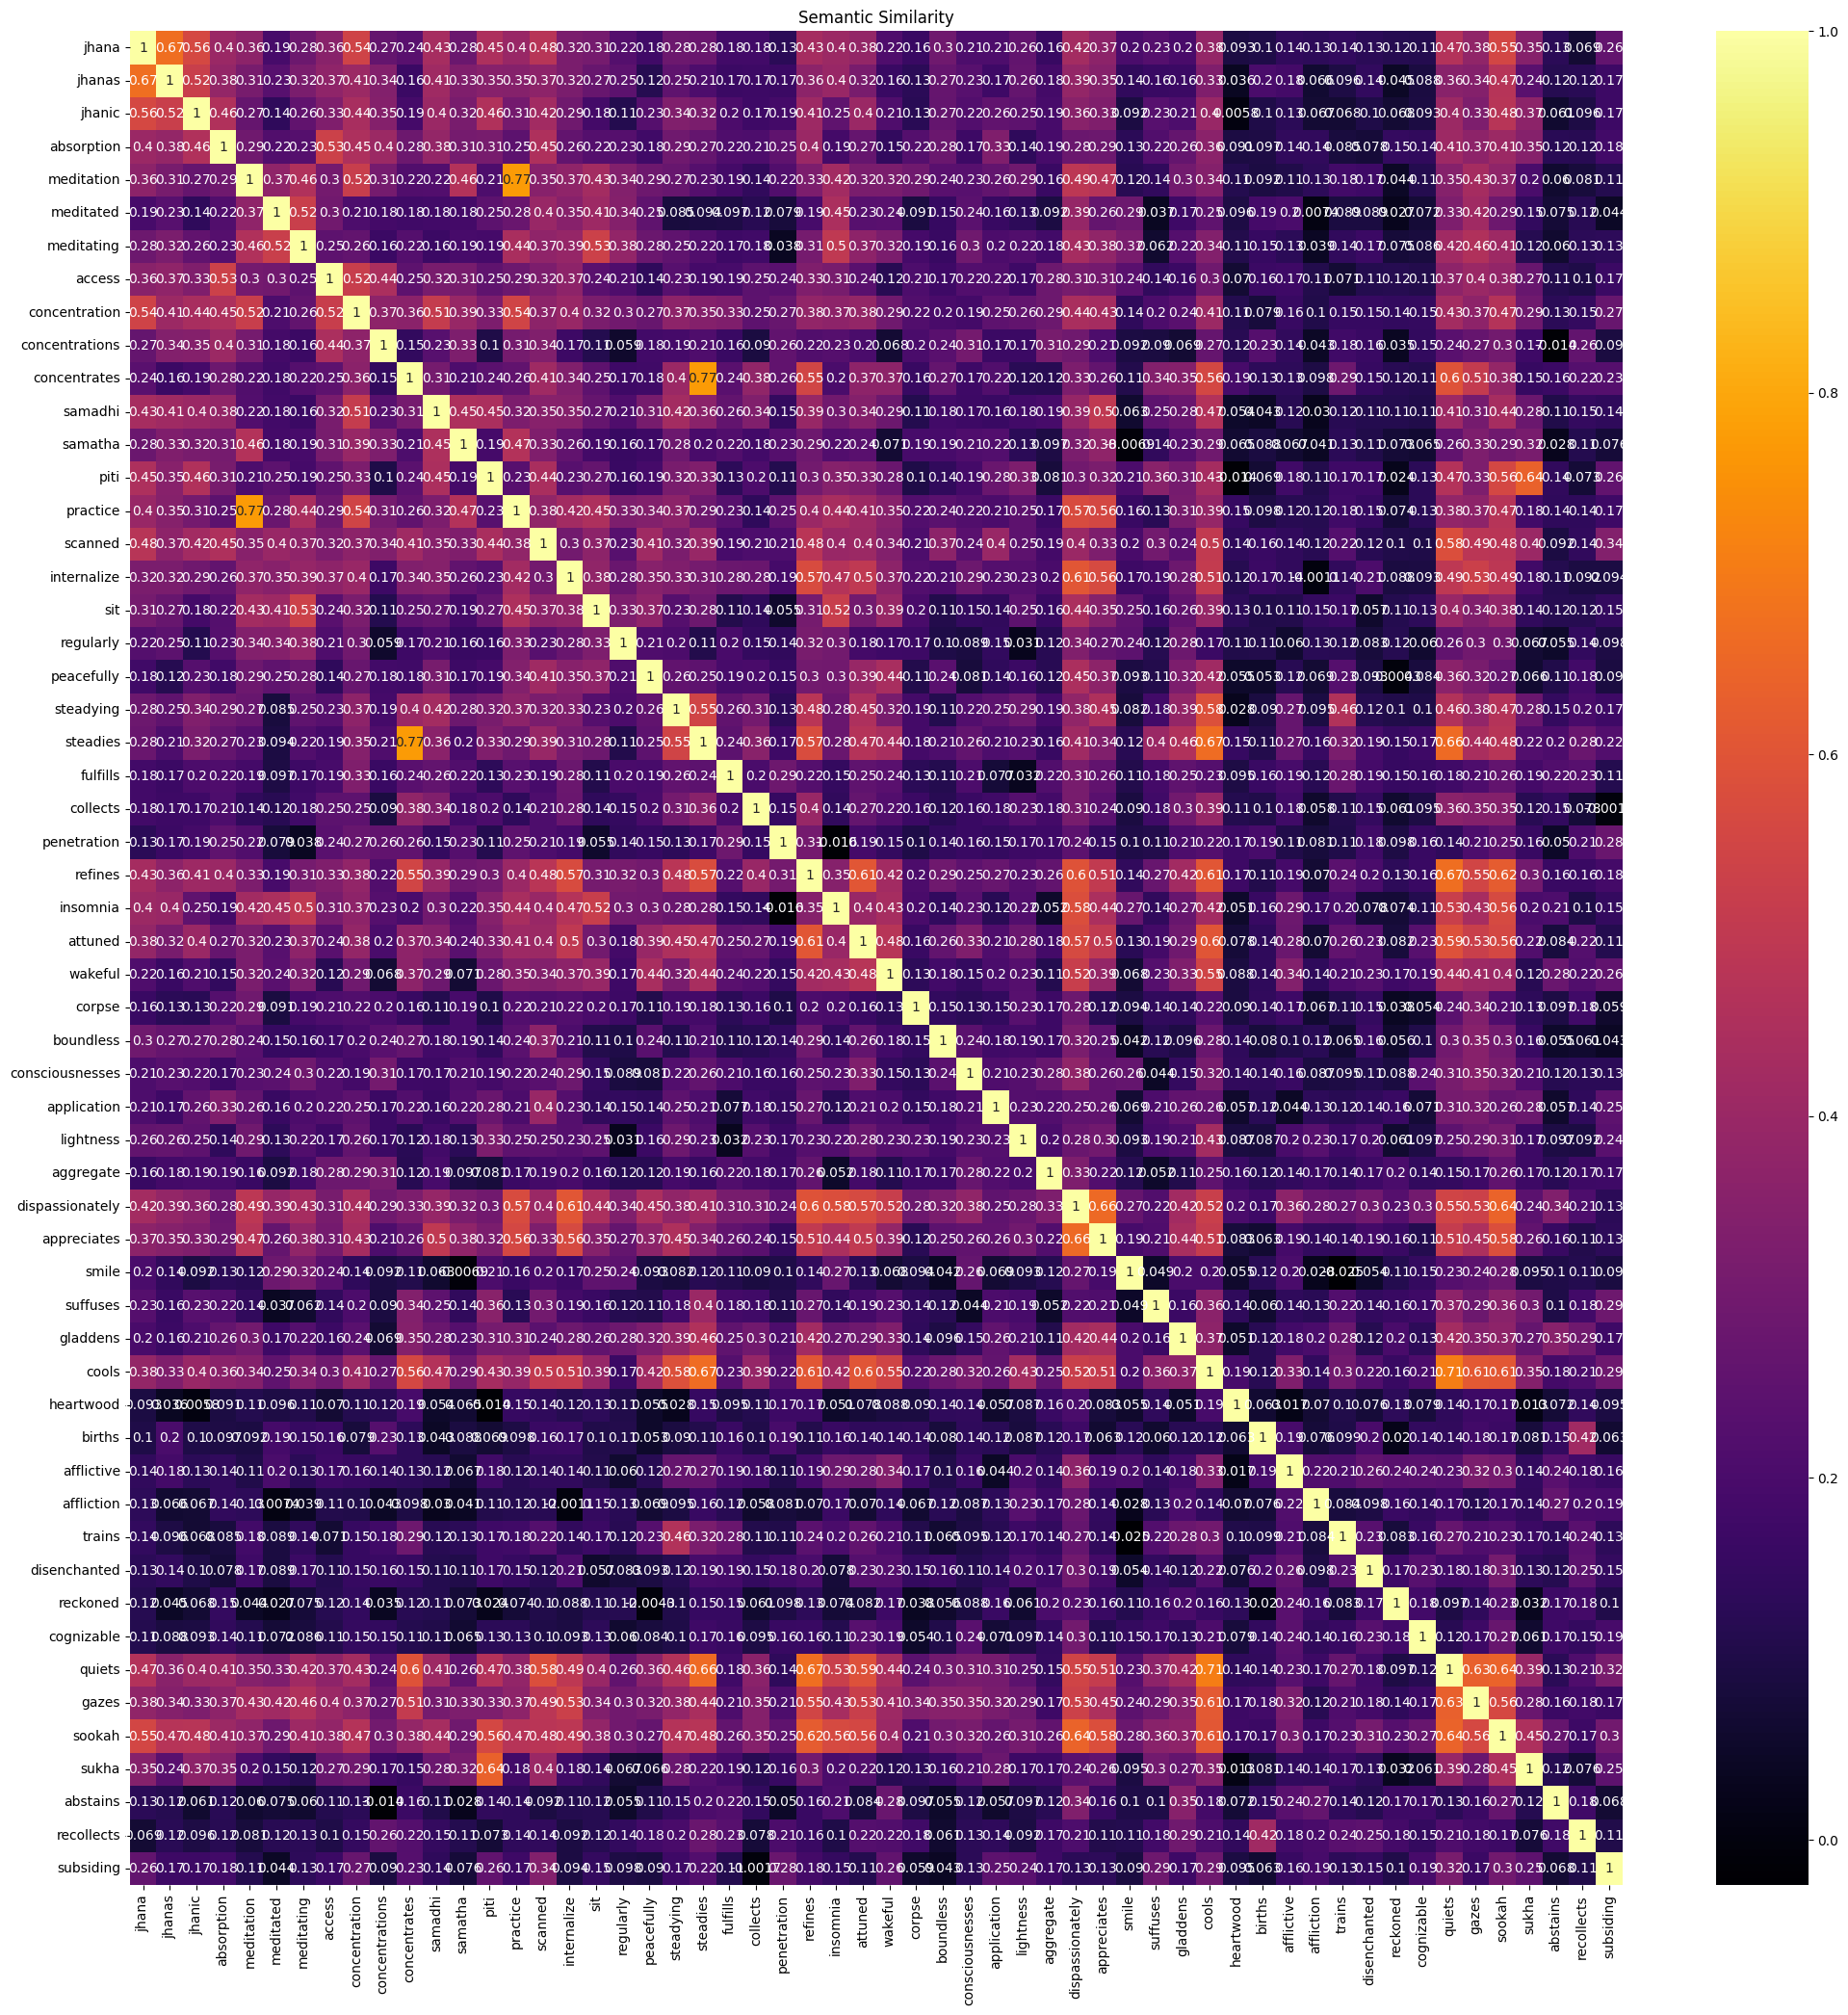

In [26]:
def plot_similarities(words):
    features = [np.array(model.wv[word]) for word in words]

    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)

    fig, ax = plt.subplots(figsize=(25, 25))
    g = sns.heatmap(
        similarities,
        annot=True,
        xticklabels=words,
        yticklabels=words,
        cmap="inferno"
    )
    g.set_xticklabels(words, rotation=90)
    g.set_yticklabels(words, rotation=0)
    g.set_title("Semantic Similarity")

words = [
    "jhana",
    "jhanas",
    "jhanic",
    "absorption",
    "meditation",
    "meditated",
    "meditating",
    "access",
    "concentration",
    "concentrations",
    "concentrates",
    "samadhi",
    "samatha",
    "piti",
    "practice",
    "scanned",
    "internalize",
    "sit",
    "regularly",
    "peacefully",
    "steadying",
    "steadies",
    "fulfills",
    "collects",
    "penetration",
    "refines",
    "insomnia",
    "attuned",
    "wakeful",
    "corpse",
    "boundless",
    "consciousnesses",
    "application",
    "lightness",
    "aggregate",
    "dispassionately",
    "appreciates",
    "smile",
    "suffuses",
    "gladdens",
    "cools",
    "heartwood",
    "births",
    "afflictive",
    "affliction",
    "trains",
    "disenchanted",
    "reckoned",
    "cognizable",
    "quiets",
    "gazes",
    "sookah",
    "sukha",
    "abstains",
    "recollects",
    "subsiding"
]

plot_similarities(words)

# Calculate Word Frequencies and Plot Gradient Heatmap by Similarity of Word



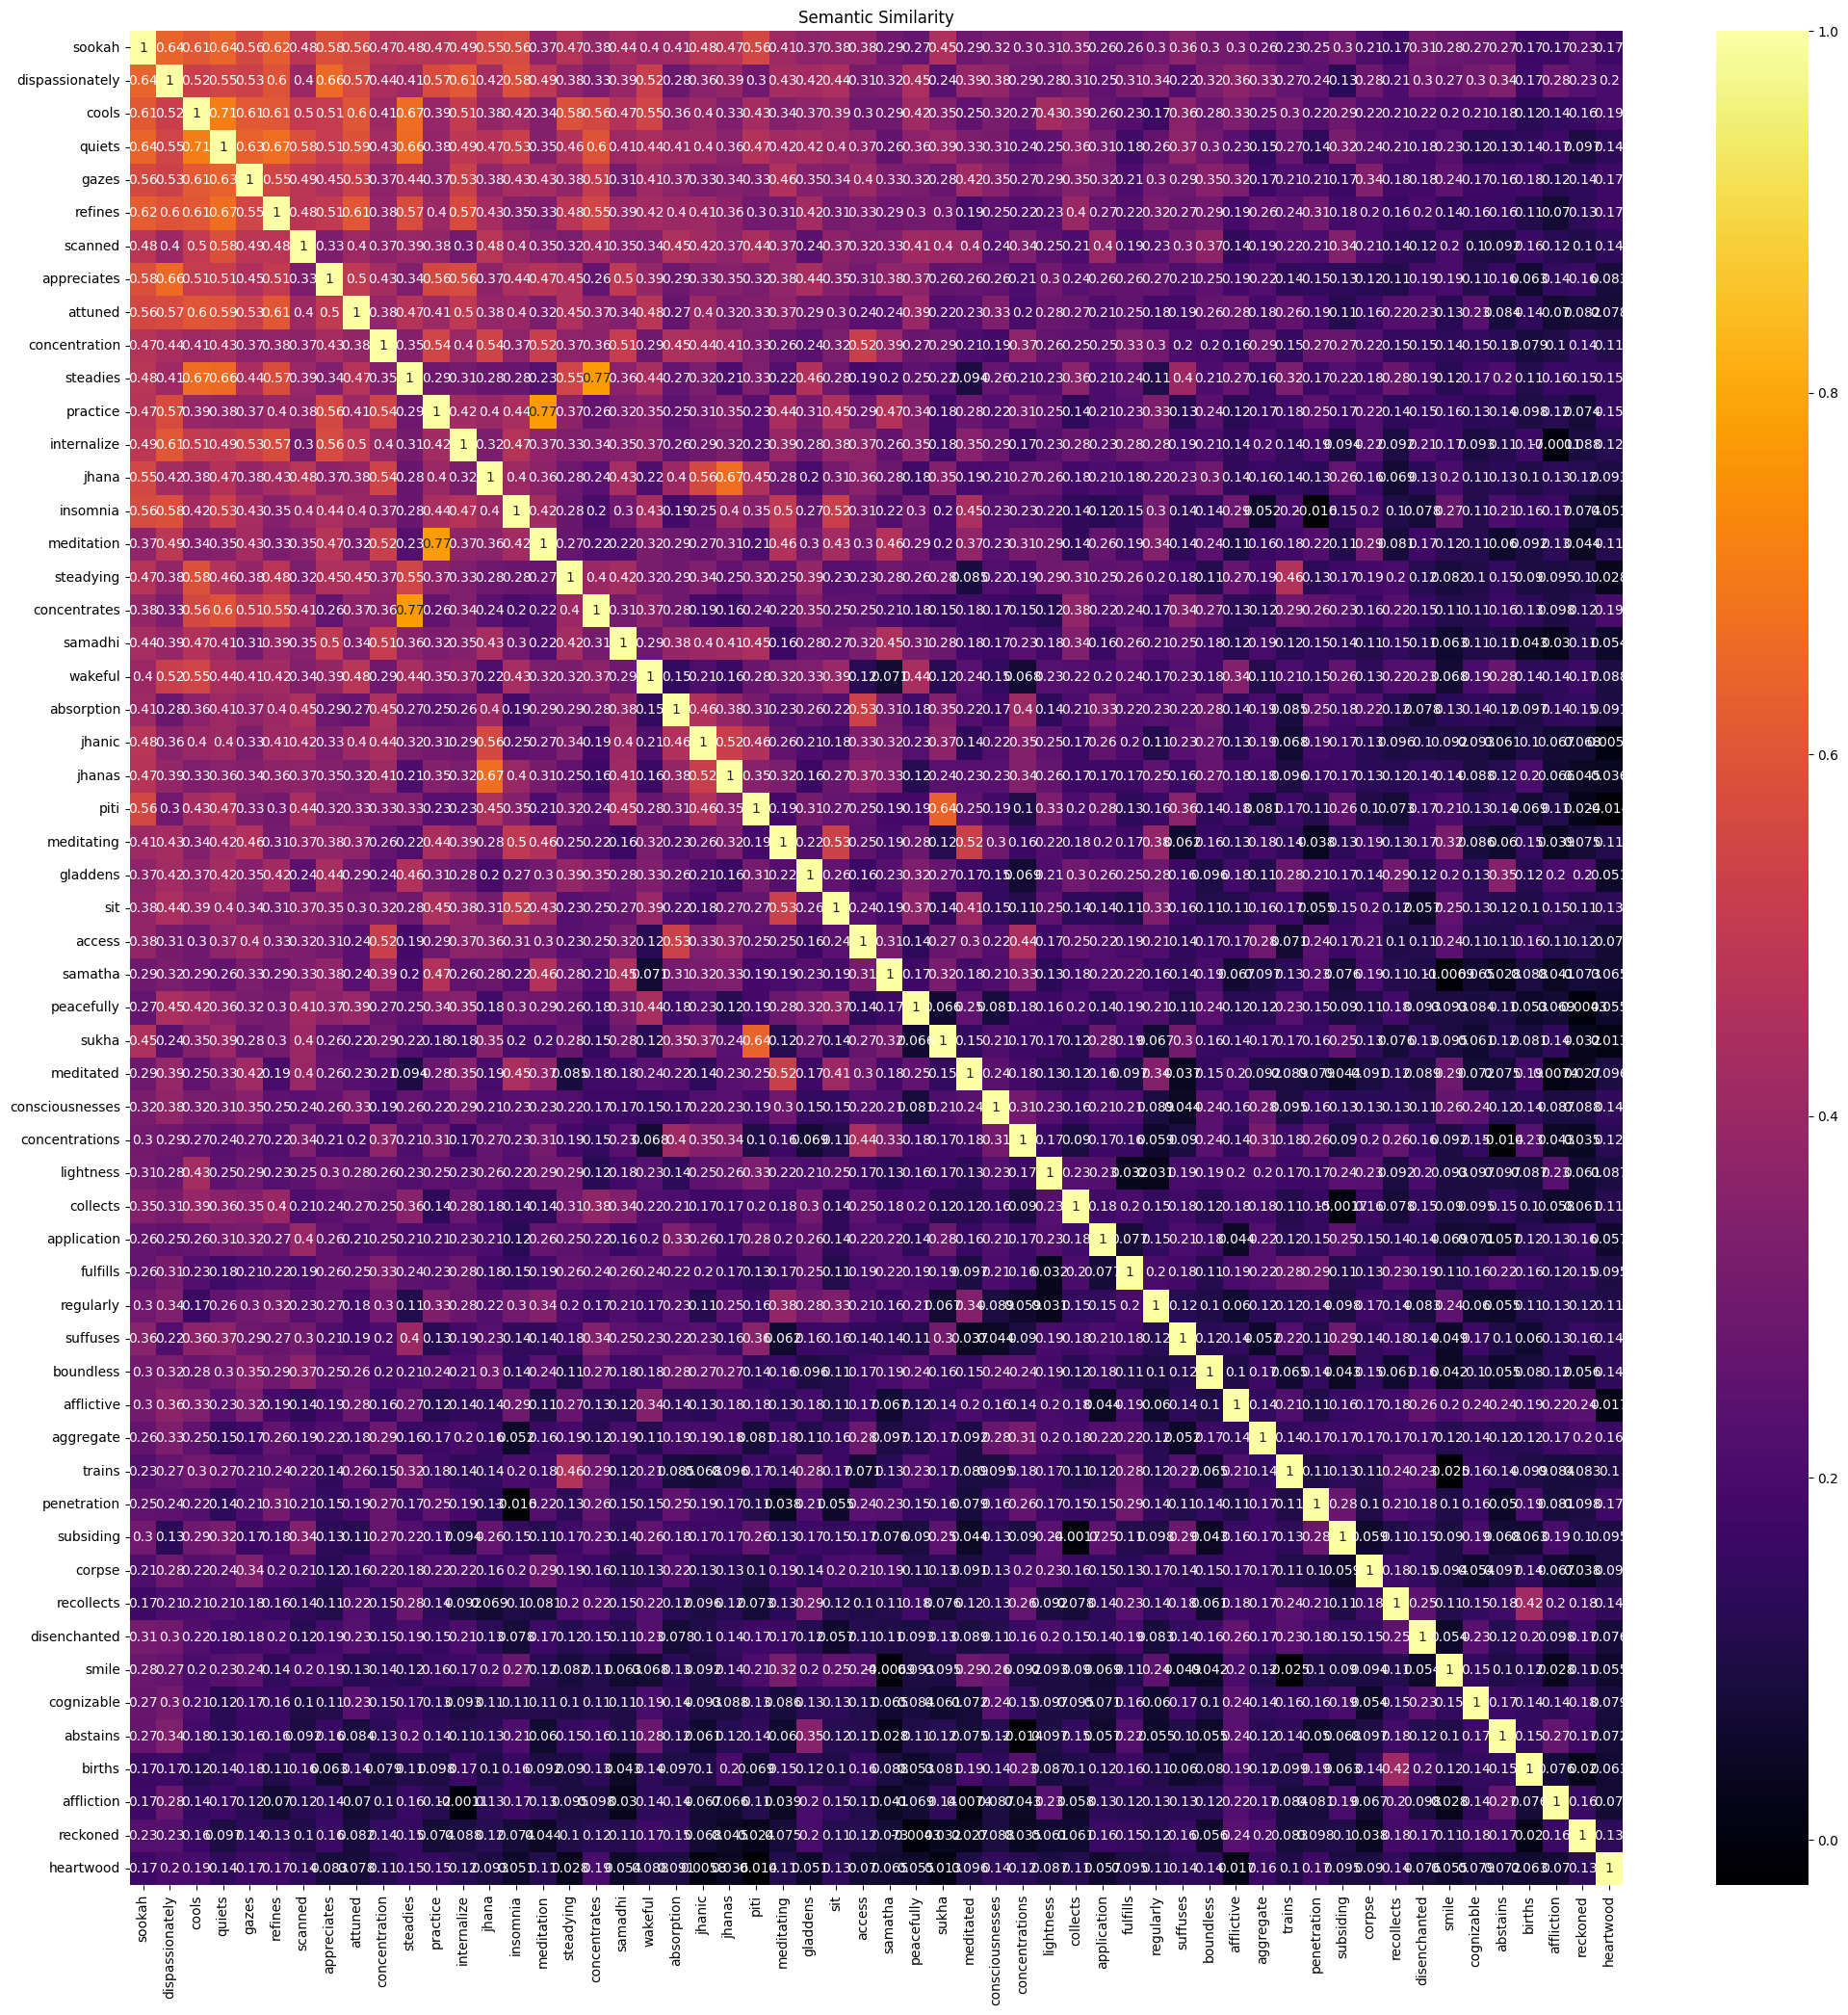

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import spatial

# Assuming 'model' is already defined and loaded with Word2Vec model
# and 'spatial' is imported from scipy

def plot_similarities(words, model):
    # Compute word vectors and similarities
    features = [np.array(model.wv[word]) for word in words]
    similarities = np.zeros((len(features), len(features)))
    for index1, feature1 in enumerate(features):
        for index2, feature2 in enumerate(features):
            similarities[index1, index2] = 1 - spatial.distance.cosine(feature1, feature2)
    
    # Calculate the average similarity for each word
    avg_similarities = similarities.mean(axis=0)
    
    # Create a mapping of word to its average similarity
    word_to_avg_sim = {word: avg_sim for word, avg_sim in zip(words, avg_similarities)}
    
    # Sort words based on the average similarity
    sorted_words = sorted(words, key=lambda word: word_to_avg_sim[word], reverse=True)
    
    # Reorder the similarities matrix according to the sorted words
    sorted_indices = [words.index(word) for word in sorted_words]
    sorted_similarities = similarities[:, sorted_indices][sorted_indices]
    
    # Plot the heatmap
    fig, ax = plt.subplots(figsize=(25, 25))
    g = sns.heatmap(
        sorted_similarities,
        annot=True,
        xticklabels=sorted_words,
        yticklabels=sorted_words,
        cmap="inferno"
    )
    g.set_xticklabels(sorted_words, rotation=90)
    g.set_yticklabels(sorted_words, rotation=0)
    g.set_title("Semantic Similarity")

# Example usage (assuming 'model' is your Word2Vec model):
# words = [...]
plot_similarities(words, model)

# Descriptive Statistics

In [28]:
def descriptive_statistics_with_unique_words(sentences):
    lengths_before = []
    lengths_after = []
    unique_words_before = set()
    unique_words_after = set()

    # Calculate lengths and unique words before tokenization
    for sentence in sentences.lines:
        words = sentence.split()
        lengths_before.append(len(words))
        unique_words_before.update(words)

    # Calculate lengths and unique words after tokenization
    for tokenized_sentence in sentences:
        lengths_after.append(len(tokenized_sentence))
        unique_words_after.update(tokenized_sentence)

    # Calculate statistics
    stats_before = {
        'total_sentences': len(lengths_before),
        'average_length': np.mean(lengths_before),
        'std_dev_length': np.std(lengths_before),
        'min_length': np.min(lengths_before),
        'max_length': np.max(lengths_before),
        'unique_words': len(unique_words_before)
    }

    stats_after = {
        'total_sentences': len(lengths_after),
        'average_length': np.mean(lengths_after),
        'std_dev_length': np.std(lengths_after),
        'min_length': np.min(lengths_after),
        'max_length': np.max(lengths_after),
        'unique_words': len(unique_words_after)
    }

    return stats_before, stats_after

# Initialize the corpus
sentences = MyCorpus()

# Calculate and print descriptive statistics including unique word counts
stats_before, stats_after = descriptive_statistics_with_unique_words(sentences)
print("Before Tokenization:", stats_before)
print("After Tokenization:", stats_after)



Found 42 .txt files in ../data/input/text/books_converted
Found 174 .txt files in ../data/input/text/web_txt
Found 26 .txt files in ../data/input/audio_transcribed/transcribed_youtube
Found 310 .txt files in ../data/input/audio_transcribed/transscribed_audio_dharma
Got 157303 lines.
Before Tokenization: {'total_sentences': 157303, 'average_length': 58.34170359115846, 'std_dev_length': 787.5310298923871, 'min_length': 0, 'max_length': 94029, 'unique_words': 286934}
After Tokenization: {'total_sentences': 141972, 'average_length': 61.31328008339673, 'std_dev_length': 775.0458004051245, 'min_length': 1, 'max_length': 80615, 'unique_words': 86518}


In [29]:
import os
import librosa

def count_words_in_file(file_path):
    try:
        with open(file_path, 'r', encoding='utf-8') as file:
            content = file.read()
        return len(content.split())
    except Exception as e:
        print(f"Error reading file: {file_path}, Error: {e}")
        return 0

def get_mp3_length(file_path):
    try:
        duration = librosa.get_duration(path=file_path)  # Changed from filename to path
        return duration / 3600  # Convert length from seconds to hours
    except Exception as e:
        print(f"Error processing MP3 file: {file_path}, Error: {e}")
        return 0

def format_number_with_snake_case(number):
    return f"{number:_}"  # Use f-string for consistency and readability

def get_descriptive_statistics(txt_directories, audio_directories):
    stats = {
        'total_txt_words': 0,
        'total_audio_hours': 0.0,  # Initialize total audio hours
    }

    # Initialize text stats
    for category in txt_directories.keys():
        stats[f'{category}_count'] = 0
        stats[f'{category}_words'] = 0

    # Initialize audio stats
    for key in audio_directories.keys():
        stats[f'{key}_audios_count'] = 0
        stats[f'{key}_audios_length'] = 0.0

    # Process text files
    for category, dir_path in txt_directories.items():
        for root, _, files in os.walk(dir_path):
            for file in files:
                if file.endswith('.txt'):
                    file_path = os.path.join(root, file)
                    words_count = count_words_in_file(file_path)
                    stats['total_txt_words'] += words_count
                    stats[f'{category}_count'] += 1
                    stats[f'{category}_words'] += words_count

    # Process audio files
    for key, dir_path in audio_directories.items():
        for root, _, files in os.walk(dir_path):
            for file in files:
                if file.endswith('.mp3'):
                    file_path = os.path.join(root, file)
                    mp3_length = get_mp3_length(file_path)
                    stats[f'{key}_audios_count'] += 1
                    stats[f'{key}_audios_length'] += mp3_length
                    stats['total_audio_hours'] += mp3_length  # Add to total audio hours

    return stats

# Dictionary paths may need to be updated based on your directory structure
txt_directories = {
    'books': "../data/input/text/books_converted",
    'web_pages': "../data/input/text/web_txt",
    'transcribed_audio_dharma': "../data/input/audio_transcribed/transscribed_audio_dharma"
}

audio_directories = {
    'youtube': "../data/input/audio/guided_meditations/youtube",
    'audiodharma_dharmaseed': "../data/input/audio/guided_meditations/audiodharma_dharmaseed"
}

statistics = get_descriptive_statistics(txt_directories, audio_directories)

# Print text statistics
print(f"Number of books: {statistics['books_count']}")
print(f"Number of words in books: {format_number_with_snake_case(statistics['books_words'])}")
print(f"Number of web pages: {statistics['web_pages_count']}")
print(f"Number of words in web pages: {format_number_with_snake_case(statistics['web_pages_words'])}")
print(f"Number of transcribed audio dharma files: {statistics['transcribed_audio_dharma_count']}")
print(f"Number of words in transcribed audio dharma files: {format_number_with_snake_case(statistics['transcribed_audio_dharma_words'])}")
print(f"Total number of words from all .txt files: {format_number_with_snake_case(statistics['total_txt_words'])}")

# Print audio statistics
print(f"Number of YouTube audios: {statistics['youtube_audios_count']}")
print(f"Total length of YouTube audios (in hours): {statistics['youtube_audios_length']:.2f}")
print(f"Number of AudioDharma_DharmaSeed audios: {statistics['audiodharma_dharmaseed_audios_count']}")
print(f"Total length of AudioDharma_DharmaSeed audios (in hours): {statistics['audiodharma_dharmaseed_audios_length']:.2f}")

# Print total audio duration
print(f"Total length of all audios (in hours): {statistics['total_audio_hours']:.2f}")



[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_63270/2850566785.py:15: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(path=file_path)  # Changed from filename to path
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_63270/2850566785.py:15: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is deprecated in librosa 0.10.0 and will be removed in version 1.0.
  duration = librosa.get_duration(path=file_path)  # Changed from filename to path
[src/libmpg123/parse.c:skip_junk():1276] error: Giving up searching valid MPEG header after 65536 bytes of junk.
/tmp/ipykernel_63270/2850566785.py:15: FutureWarning: PySoundFile failed. Trying audioread instead.
	Audioread support is

Number of books: 42
Number of words in books: 6_250_031
Number of web pages: 174
Number of words in web pages: 830_656
Number of transcribed audio dharma files: 310
Number of words in transcribed audio dharma files: 1_963_508
Total number of words from all .txt files: 9_044_195
Number of YouTube audios: 26
Total length of YouTube audios (in hours): 16.53
Number of AudioDharma_DharmaSeed audios: 362
Total length of AudioDharma_DharmaSeed audios (in hours): 333.47
Total length of all audios (in hours): 350.00
